###**앙상블 학습**

**1. 앙상블 학습 개요**

앙상블 학습(Ensemble learning)을 통한 분류
- 여러 개의 분류기(Classifier)를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 집단지성과 같은 방법으로, 대부분의 정형 데이터 분류 시 뛰어난 성능을 발휘함
- 대표적 앙상블 알고리즘
  - 랜덤 포레스트
  - 그래디언트 부스팅 알고리즘
- 앙상블 학습의 유형
  - 보팅(Voting): 서로 다른 알고리즘을 가진 분류기를 결합하는 방법
  - 배깅(Bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반이나 데이터 샘플링을 다르게 가져가서 학습을 수행하면서 보팅을 수행하는 방법
  - 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행하는 방법
  - 스태킹(Stacking): 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법

**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

(1) 하드 보팅을 이용한 분류
- 다수결의 원칙과 같은 유형
- 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

(2) 소프트 보팅
- 분류기들의 레이블 값 결정 확률으 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것
- 일반적인 보팅 방식에 해당
- 하드 보팅보다 예측성능이 뛰어남

**보팅 분류기(Voting Classifier)**
- 사이킷런의 보팅방식 앙상블
- 주요 생성 인자: estimator, voting
  - estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음
  - voting: 'Hard' = 하드 보팅(default) / 'soft' = 소프트 보팅


먼저 로지스틱 회귀와 KNN을 기반으로한 보팅 분류기를 형성하기 위해 필요한 모듈과 데이터를 로딩한후 위스콘신 데이터 세트를 간략히 살펴보자.

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


이제 로지스틱 회귀와 KNN을 기반으로한 소프트 보팅방식의 새로운 보팅 분류기를 형성해보자.


In [2]:
# 개별 모델은 로지스틱 회귀와 KNN이다.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))



Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


여기서 보면 보팅 분류기의 정확도가 조금 높게 나타난 것을 확인할 수 있지만, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다. 즉, 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅보다 나을 수 있다는 것이다.

###**랜덤 포레스트**
**랜덤 포레스트의 개요 및 실습**

배깅(bagging): 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘으로, 대표적인 알고리즘이 랜덤 포레스트이다.

랜덤 포레스트 특징
- 비교적 빠른 수행속도를 가짐
- 다양한 영역에서 예측 성능을 보이고 있음
- 기반 알고리즘이 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가짐
  - 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링하여 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 수행함
- 개별적 분류기의 기반 알고리즘은 결정 트리이나, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 부트스트래핑(bootstraping) 분할 방식의 데이터임
- 이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하게 됨
- 사이킷런에선 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함

이제 앞의 사용자 행동 인식 데이터 세트를 RandomForestClassifier을 이용하여 예측해보자.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [5]:
def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당한다.
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위하여 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩하고 칼럼명은 feature_name으로 부여
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용하여 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


**랜덤 포레스트 하이퍼 파리미터 및 튜닝**

트리 기반 앙상블 알고리즘의 단점
- 하이퍼 파라미터가 너무 많음
- 튜닝을 위한 시간이 많이 소모됨
- 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

랜덤 포레스트 하이퍼 파라미터
- n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정 (디폴트:10개)
- max_features: 결정 트리에서 사용된 max_feature와 동일하나 디폴트가 'sqrt'로 설정됨
- max_depth, min_samples_leaf, min_samples_split: 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터


In [7]:
from sklearn.model_selection import GridSearchCV

params={'max_depth': [8, 16, 24], 'min_samples_leaf': [1, 6, 12], 'min_samples_split': [2, 8, 16]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


In [8]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


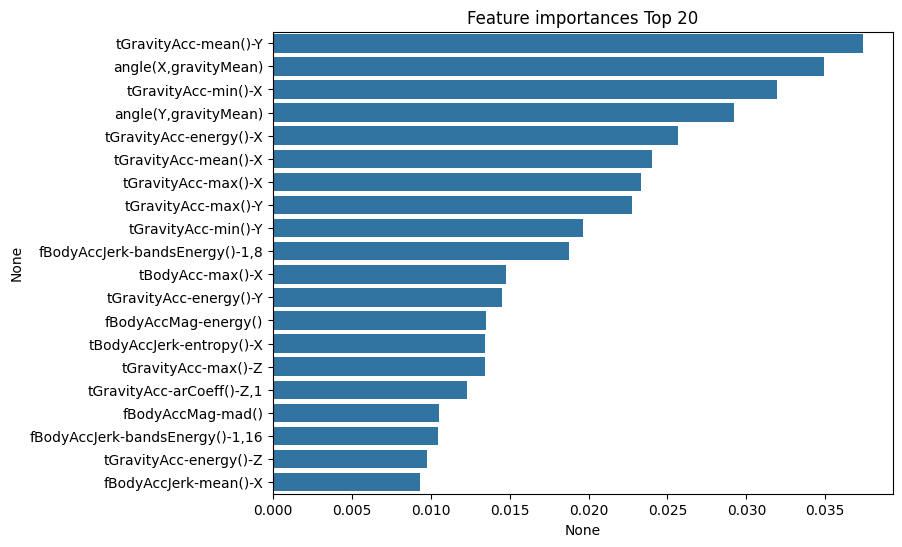

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

###**GBM(Gradient Boosting Machine)**
**GBM의 개요 및 실습**

부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

대표적 구현: AdaBoost(Adaptive boosting), 그래디언트 부스트

- 에이다 부스트(AdaBoost): 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적 알고리즘
  - 첫 번째 약한 학습기가 분류기준1로 데이터셋을 분류함, 이때 잘못 분류된 오류데이터가 존재하는 것을 확인 가능
  - 오류 데이터에 대하여 가중치 값을 부여함, 가중치가 부여되면 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커짐
  - 두 번째 약한 학습기가 분류기준 2로 데이터를 분류함 마찬가지로 잘못 분류된 오류 데이터가 존재함
  - 잘못분류된 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여함
  - 이들을 모두 결합하면 개별 약한 학습기보다 훨씬 정확도가 높아지게 됨
- GBM: 에이다 부스트와 비슷하나, 가중치 업데이트를 경사 하강법을 이용함
  - 분류 실제 결과값을 y, 피처를 x1,x2,x3...라하고 이에 기반한 예측함수를 F(x)라 하면 오류에 대한 식은 h(x) = y-F(x)가 됨
  - 이 오류 식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 함

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초 '.format(time.time()-start_time))

GBM 정확도: 0.9253
GBM 수행 시간: 1369.0초 


**GBM 하이퍼 파라미터 소개**
- loss: 경사 하강법에서 사용할 비용함수를 지정(디폴트: deviance)
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률
- n_estimators: weak learner의 개수 (디폴트:100)
- subsamples: weak learner가 학습에 사용하는 데이터 샘플링의 비율(디폴트:1)

GBM은 과적합에도 강한 뛰어난 예측성능을 가지는 알고리즘이나 수행시간이 오래걸린다는 단점이 있다.

따라서 이를 기반으로 XGBoost, LightGBM 등 다양한 GBM 기반 알고리즘이 만들어지고 있다.

###**XGBoost(eXtra Gradient Boost)**
**XGBoost 개요**

앙상블 학습에서 가장 각광 받고 있는 알고리즘 중 하나로, XGBoost의 장점은 다음과 같다.
- 뛰어난 예측성능
- GBM 대비 빠른 수행시간
- 과적합 규제(Regularization)
- Tree pruning(나무 가지치기)
- 자체 내장된 교차 검증
- 결손값 자체 처리



In [11]:
# pip install xgboost==1.5.0

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

XGBoost 유형별 하이퍼 파라미터
- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음

- 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭함

- 학습 태스크 파라미터: 학습 수행 시의 객체함수, 평가를 위한 지표 등을 설정하는 파라미터

파라미터를 튜닝하는 경우의 수는 여러 가지 상황에 따라 달라지는데, 예를 들어 피처의 수가 너무 많거나 피처 간 상관되는 정도가 많거나 데이터 세트에 따라 여러가지 특성이 있을 수 있다.

만일 과적합 문제가 심각하면 다음과 같이 적용할 것을 고려 가능하다
- eta값을 낮추고 num_round를 높인다
- max_depth값을 낮춘다.
- min_child_weight 값을 높인다.
- gamma 값을 높인다.
- subsample과 colsample_bytree를 조정한다.

XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있는데 그중 수행 속도를 향상 시키기 위한 대표적인 기능으로 조기중단 기능이 있다. 기분 GBM의 경우 n_estimator에 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하며 중간에 반복을 멈출 수 없고 지정된 횟수를 다 완료해야 하지만, XGBoost와 LightGBM의 경우 모두 조기 중단 기능이 있어 반복 횟수에 다 도달하지 않더라도 예측 오류가 더이상 개선됮 않으면 반복을 중지해 수행시간을 개선한다.

In [13]:
import xgboost

print(xgboost.__version__)

2.1.4


**파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

In [14]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [15]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [16]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [17]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환
# 학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력한다.

In [18]:
params = {'max_depth':3, 'eta':0.05, 'objective': 'binary:logistic', 'eval_metric':'logloss'}
num_rounds = 400

파이썬 래퍼 XGBoost의 경우 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달한다.

또한 학습 시 XGBoost는 수행 속도를 개선하기 위하여 조기 중단 기능을 제공하낟. 이때 조기 중단은 XGBoost가 수행성능을 대선하기 위해 더이상 지표 개선이 없을 경우 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 하는 것이다.

조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용하는데, XGBoost는 학습 반복 시마다 검증 데이터 세트를 이용해 성능을 평가할 수 있는 기능을 제공한다. 이때 조기 중단은 trian()함수에 early_stopping_rounds파라미터를 입력하여 설정한다. 여기서 주의해야 할 점이 해당 파라미터를 사용하는 경우 반드시 평가용 데이터 세트 지정과, eval_metric을 함께 설정해야 한다는 것이다.

In [19]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방함

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [20]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과 값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 List 객체인 preds에 저장함
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과 값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도 :{0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

ROC AUC값: 0.9937


In [22]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
오차 행렬
[[35  2]
 [ 2 75]]
정확도:0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC: 0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

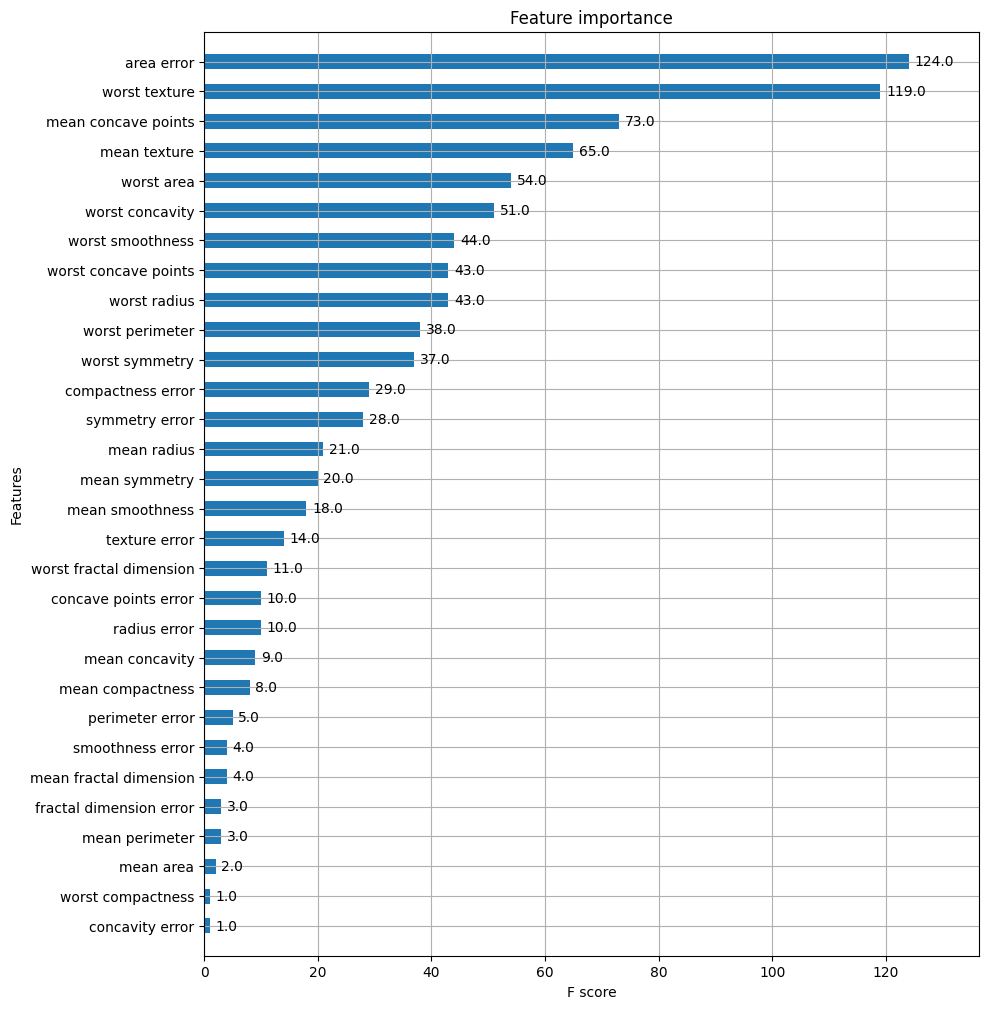

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, height=0.5, ax=ax)


**사이킷런 래퍼 XGBoost의 개요 및 적용**

- 다른 Estimator와 동일하게 fit()과 predict()만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용 가능하다.

 사이킷런 래퍼 XGBoost에서는 파이썬 래퍼 XGBoost와 약간의 차이가 있는데 이 차이는 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇가를 다음과 같이 변경한 것이다.
 - eta -> learning_rate
 - sub_samples -> subsample
 - lambda -> reg_lambda
 - alpha -> reg_alpha

In [24]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBclassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


In [26]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
오차 행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9954


In [27]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, verbose=True,eval_set=evals)

ws50_preds=xgb_wrapper.predict(X_test)
ws50_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [28]:
get_clf_eval(y_test, ws50_preds, ws50_preds_proba)

오차 행렬
[[35  2]
 [ 2 75]]
오차 행렬
[[35  2]
 [ 2 75]]
정확도:0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC: 0.9961


In [34]:
#early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr, eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(X_test)
ws10_preds_proba=xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_preds_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

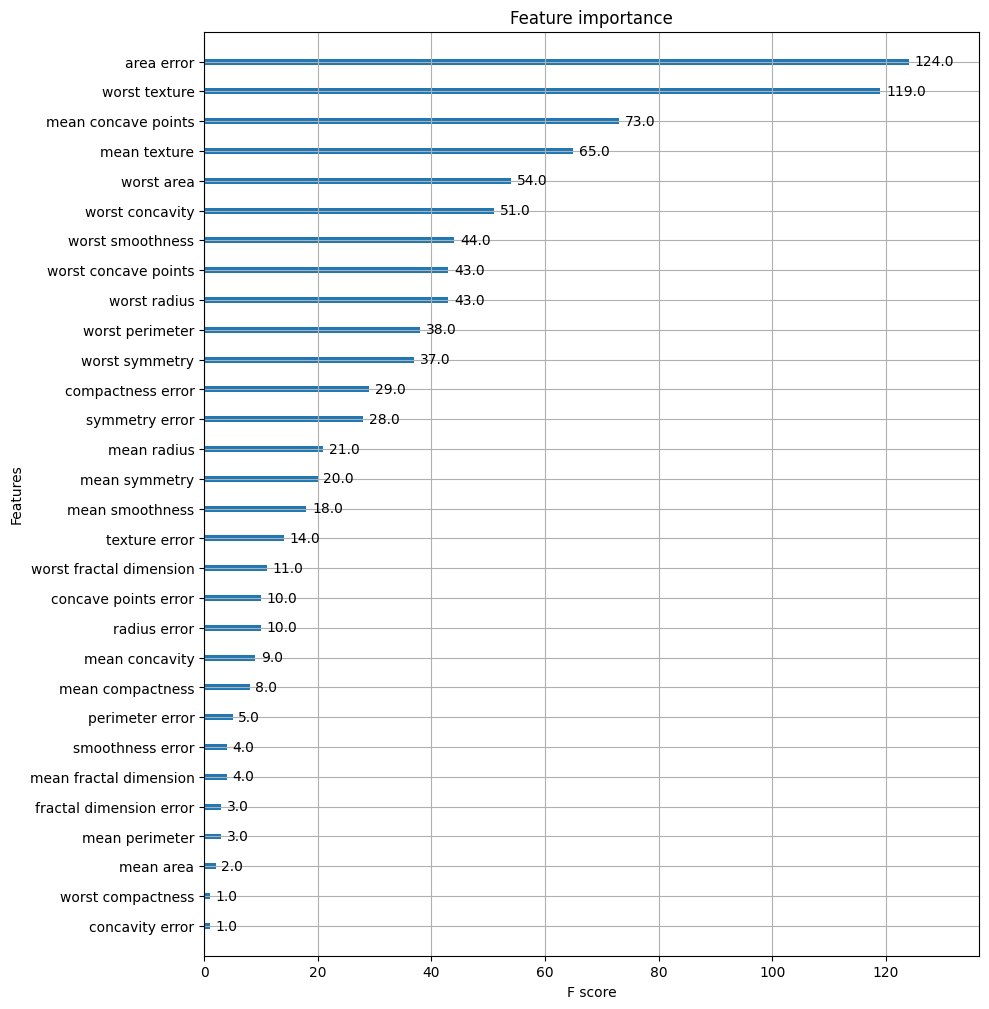

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
#사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)